In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import re

# Import helper functions
import helper_functions as fu

In [3]:
votes_meps_EP9_or = fu.read_xlsx('data/EP9_RCVs_2022_06_22.xlsx')
voted_docs_EP9_or = fu.read_xlsx('data/EP9_Voted_docs.xlsx')
votes_meps_EP8_or = fu.read_xlsx('data/EP8_RCVs_2019_06_25.xlsx')
voted_docs_EP8_or = fu.read_xlsx('data/EP8_Voted_docs.xlsx')
votes_meps_EP7_or = fu.read_xlsx('data/EP7_RCVs_2014_06_19.xlsx')
voted_docs_EP7_or = fu.read_xlsx('data/EP7_Voted_docs.xlsx')

In [6]:
# Save original data as csv
votes_meps_EP9_or.to_csv('data/EP9_RCVs_2022_06_22.csv', index=False)
voted_docs_EP9_or.to_csv('data/EP9_Voted_docs.csv', index=False)
votes_meps_EP8_or.to_csv('data/EP8_RCVs_2019_06_25.csv', index=False)
voted_docs_EP8_or.to_csv('data/EP8_Voted_docs.csv', index=False)
votes_meps_EP7_or.to_csv('data/EP7_RCVs_2014_06_19.csv', index=False)
voted_docs_EP7_or.to_csv('data/EP7_Voted_docs.csv', index=False)

In [12]:
print(votes_meps_EP9_or.shape)
print(votes_meps_EP8_or.shape)
print(votes_meps_EP7_or.shape)
display(votes_meps_EP9_or.head())
display(voted_docs_EP9_or.head())

(811, 13469)
(858, 10261)
(853, 6970)


,WebisteEpID,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,197490,Magdalena,ADAMOWICZ,"ADAMOWICZ, Magdalena",yes,Poland,Independent,EPP,2019-07-02,2024-12-31,...,2,2,2,1,1,2,1,2,1,1
1,189525,Asim,ADEMOV,"ADEMOV, Asim",yes,Bulgaria,Citizens for European Development of Bulgaria,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
2,124831,Isabella,ADINOLFI,"ADINOLFI, Isabella",yes,Italy,Forza Italia,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
3,197826,Matteo,ADINOLFI,"ADINOLFI, Matteo",yes,Italy,Lega,IDG,2019-07-02,2024-12-31,...,2,2,1,2,2,1,1,3,2,1
4,197403,Alex,AGIUS SALIBA,"AGIUS SALIBA, Alex",yes,Malta,Partit Laburista,S&D,2019-07-02,2024-12-31,...,3,3,1,2,2,2,3,3,2,1


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Policy area,Subject,Final vote?,Am No.,Author,RCV,Vote,Yes,No,Abs
0,1,1,1,15.07.2019,Tuesday - request by the GUE/NGL group,NaN,Non,Proposal for a decision,s,0,...,Foreign & security policy,Procedural vote,1.0,NaN,0,RCV,-,83,142,72
1,2,2,1,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 13,0.0,NaN,original text,RCV,+,311,269,33
2,3,2,2,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 14,0.0,NaN,original text,RCV,+,437,155,33
3,4,2,3,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 17,0.0,NaN,original text,RCV,+,441,158,27
4,5,2,4,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 19,0.0,NaN,original text,RCV,+,466,146,41


In [16]:
# last column name indicates total numbers of vote in each period
total_votes_14to22 = voted_docs_EP9_or.shape[0] + voted_docs_EP8_or.shape[0] + voted_docs_EP7_or.shape[0]

print(f"There have been {total_votes_14to22} RCV votes in the European Parliament from 2014 to 2022.")

There have been 30672 RCV votes in the European Parliament from 2014 to 2022.


In [20]:
# Only choose legislative procedure with Parliament as co-legislator
voted_docs_EP9 = voted_docs_EP9_or[voted_docs_EP9_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP9 = voted_docs_EP9[voted_docs_EP9['Procedure'] != '*']
voted_docs_EP9 = voted_docs_EP9[voted_docs_EP9['Procedure'] != '* ']

voted_docs_EP8 = voted_docs_EP8_or[voted_docs_EP8_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP8 = voted_docs_EP8[voted_docs_EP8['Procedure'] != '*']
voted_docs_EP8 = voted_docs_EP8[voted_docs_EP8['Procedure'] != '* ']

voted_docs_EP7 = voted_docs_EP7_or[voted_docs_EP7_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP7 = voted_docs_EP7[voted_docs_EP7['Procedure'] != '*']
voted_docs_EP7 = voted_docs_EP7[voted_docs_EP7['Procedure'] != '* ']

total_votes_leg = voted_docs_EP9.shape[0] + voted_docs_EP8.shape[0] + voted_docs_EP7.shape[0]
print(f"The European Parliament voted as co-legislator on {total_votes_leg} legal procedures, excluding votes on budget.")

# Count votes on budget
total_votes_bud = voted_docs_EP9_or[
    voted_docs_EP9_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0] + voted_docs_EP8_or[
        voted_docs_EP8_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0] + voted_docs_EP7_or[
            voted_docs_EP7_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0]
print(f"The European Parliament voted as co-legislator on {total_votes_bud} budget procedures.")

The European Parliament voted as co-legislator on 6418 legal procedures, excluding votes on budget.
The European Parliament voted on 2392 budget procedures.


How many times did MEPs on average not attend a vote?

In [45]:
# mean of mean of 5s and 4s of each MEP on all 30672 RCV votes
# add column attendence with count of all 5s and 4s in each row
votes_meps_EP9_or['attendance'] = votes_meps_EP9_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP9_or.shape[0]
votes_meps_EP8_or['attendance'] = votes_meps_EP8_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP8_or.shape[0]
votes_meps_EP7_or['attendance'] = votes_meps_EP7_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP7_or.shape[0]

# average attendance
mean_att_EP9 = 1 - votes_meps_EP9_or['attendance'].mean()
print(f"Between 2019-2022, the average attendance of MEPs to all votes was {mean_att_EP9:.2%}")

mean_att_EP8 = 1 - votes_meps_EP8_or['attendance'].mean()
print(f"Between 2014-2019, the average attendance of MEPs to all votes was {mean_att_EP8:.2%}")

mean_att_EP7 = 1 - votes_meps_EP7_or['attendance'].mean()
print(f"Between 2009-2014, the average attendance of MEPs to all votes was {mean_att_EP7:.2%}")

Between 2019-2022, the average attendance of MEPs to all votes was 96.97%
Between 2014-2019, the average attendance of MEPs to all votes was 89.76%
Between 2009-2014, the average attendance of MEPs to all votes was 85.78%


Simon Hix fragen, was der Unterschied zwischen 4 - absent und 5 - did not vote ist.

How many legislative procedures were rejected?

In [48]:
# percentage of votes rejected out of the 2582 legislative procedures
votes_rejected = voted_docs_EP9[voted_docs_EP9['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_rejected_perc:.2%} of all legislative procedures were rejected.")

votes_rejected = voted_docs_EP8[voted_docs_EP8['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP8.shape[0]
print(f"Between 2014-2019, {votes_rejected_perc:.2%} of all legislative procedures were rejected.")

votes_rejected = voted_docs_EP7[voted_docs_EP7['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP7.shape[0]
print(f"Between 2009-2014, {votes_rejected_perc:.2%} of all legislative procedures were rejected.")

Between 2019-2022, 38.26% of all legislative procedures were rejected.
Between 2014-2019, 39.11% of all legislative procedures were rejected.
Between 2009-2014, 27.07% of all legislative procedures were rejected.


How many laws were passed after the first reading?

In [50]:
# percentage of votes accepted or rejected after the first reading
votes_first_reading = voted_docs_EP9[voted_docs_EP9['Procedure'] == '***I'].shape[0]
votes_first_reading_perc = votes_first_reading/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the first reading.")

votes_first_reading = voted_docs_EP9[voted_docs_EP9['Procedure'] == '***II'].shape[0]
votes_first_reading_perc = votes_first_reading/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the second reading.")


votes_first_reading = voted_docs_EP9[voted_docs_EP9['Procedure'] == '***III'].shape[0]
votes_first_reading_perc = votes_first_reading/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the third reading.")


votes_first_reading = voted_docs_EP9[voted_docs_EP9['Procedure'] == '***'].shape[0]
votes_first_reading_perc = votes_first_reading/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were on resolutions or motions of resolutions initiated by the parliament.")


Between 2019-2022, 92.53% of votes were accepted or rejected after the first reading.
Between 2019-2022, 4.73% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 2.71% of votes were on resolutions or motions of resolutions initiated by the parliament.


Establish Majority Labels

In [62]:
# Merge all votes_meps dataframes to one
# create new column "FullName" for votes_meps_EP7_or
votes_meps_EP8_or['FullName'] = votes_meps_EP8_or['Fname'] + ' ' + votes_meps_EP8_or['Lname']
votes_meps = pd.concat([votes_meps_EP9_or, votes_meps_EP8_or, votes_meps_EP7_or], ignore_index=True)

display(votes_meps.head())

# drop columns that are not needed
votes_meps = votes_meps.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "MEP ID", "Activ", "Country", "Party", "attendance", "votes_5"
    ])

display(votes_meps.head())

,WebisteEpID,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,...,13453,13454,13455,13456,13457,13458,13459,attendance,votes_5,MEP ID
0,197490.0,Magdalena,ADAMOWICZ,"ADAMOWICZ, Magdalena",yes,Poland,Independent,EPP,2019-07-02,2024-12-31,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.062560,842.0,NaN
1,189525.0,Asim,ADEMOV,"ADEMOV, Asim",yes,Bulgaria,Citizens for European Development of Bulgaria,EPP,2019-07-02,2024-12-31,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.042202,568.0,NaN
2,124831.0,Isabella,ADINOLFI,"ADINOLFI, Isabella",yes,Italy,Forza Italia,EPP,2019-07-02,2024-12-31,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.006167,83.0,NaN
3,197826.0,Matteo,ADINOLFI,"ADINOLFI, Matteo",yes,Italy,Lega,IDG,2019-07-02,2024-12-31,...,2.0,2.0,1.0,1.0,3.0,2.0,1.0,0.005944,80.0,NaN
4,197403.0,Alex,AGIUS SALIBA,"AGIUS SALIBA, Alex",yes,Malta,Partit Laburista,S&D,2019-07-02,2024-12-31,...,2.0,2.0,2.0,3.0,3.0,2.0,1.0,0.028828,388.0,NaN


,FullName,EPG,Start,End,1,2,3,4,5,6,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,"ADAMOWICZ, Magdalena",EPP,2019-07-02,2024-12-31,5,2,1,2,2,1,...,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1,"ADEMOV, Asim",EPP,2019-07-02,2024-12-31,5,2,1,1,1,1,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
2,"ADINOLFI, Isabella",EPP,2019-07-02,2024-12-31,3,3,3,3,3,1,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
3,"ADINOLFI, Matteo",IDG,2019-07-02,2024-12-31,2,2,2,2,2,2,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0
4,"AGIUS SALIBA, Alex",S&D,2019-07-02,2024-12-31,4,1,1,1,1,2,...,3.0,3.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0


In [67]:
# unpivot dataframe from wide to long format
df_mps_melted = votes_meps.melt(id_vars=['FullName', 'EPG', "Start", "End"], var_name='Title', value_name='Vote')
#change vote to int if not nan
df_mps_melted['Vote'] = df_mps_melted['Vote'].apply(lambda x: int(x) if x == x else x)
df_mps_melted['Vote'] = df_mps_melted['Vote']
# drop rows with NaN values in column "Vote"
df_mps_melted = df_mps_melted.dropna(subset=['Vote'])

print(df_mps_melted.shape)
display(df_mps_melted.tail(20))

(25649198, 6)


,FullName,EPG,Start,End,Title,Vote
33941867,"MATTHIEU, Sara",Greens/EFA,2020-10-08,2024-12-31,13459,1.0
33941868,"ENGERER, Cyrus",S&D,2020-11-05,2024-12-31,13459,1.0
33941869,"GHEORGHE, Vlad",REG,2020-11-10,2024-12-31,13459,1.0
33941870,"MARKEY, Colm",EPP,2020-11-20,2024-12-31,13459,1.0
33941871,"MITUȚA, Alin",REG,2020-12-28,2024-12-31,13459,1.0
33941872,"SCHALLER-BAROSS, Ernő",NI,2021-01-10,2024-12-31,13459,5.0
33941873,"VANDENKENDELAERE, Tom",EPP,2021-01-25,2024-12-31,13459,1.0
33941874,"WIESNER, Emma",REG,2021-02-04,2024-12-31,13459,1.0
33941875,"HOOGEVEEN, Michiel",ECR,2021-04-15,2024-12-31,13459,1.0
33941876,"REUTEN, Thijs",S&D,2021-04-15,2024-12-31,13459,1.0


Legend of votes
- 0 not an MEP [at the time of the vote]
- 1 for
- 2 against
- 3 abstention
- 4 absent
- 5 did not vote
- 6 motivated [only for EP6: MEP was absent, but this was explained by a certificate]

Number of votes: (25649198, 6)
Number of NaNs: 1150800
Number of zeros in votes: 3198485
Number of 'did not vote' in votes: 923871


,FullName,EPG,Start,End,Title,Vote
119,"CARVALHAIS, Isabel",S&D,2019-09-03,2024-12-31,1,0.0
366,"KOFOD, Jeppe",NaN,2019-07-02,2019-07-02,1,0.0
657,"TIMMERMANS, Frans",NaN,2019-07-02,2019-07-02,1,0.0
693,"VELOPOULOS, Kyriakos",ECR,2019-07-02,2019-07-06,1,0.0
752,"DANTI, Nicola",REG,2019-09-05,2024-12-31,1,0.0
753,"ANGEL, Marc",S&D,2019-12-10,2024-12-31,1,0.0
754,"COMÍN I OLIVERES, Antoni",NI,2020-01-13,2024-12-31,1,0.0
755,"GLAVAK, Sunčana",EPP,2019-12-01,2024-12-31,1,0.0
756,"NISTOR, Gheorghe-Vlad",EPP,2019-12-02,2024-12-31,1,0.0
757,"PUIGDEMONT I CASAMAJÓ, Carles",NI,2020-01-13,2024-12-31,1,0.0


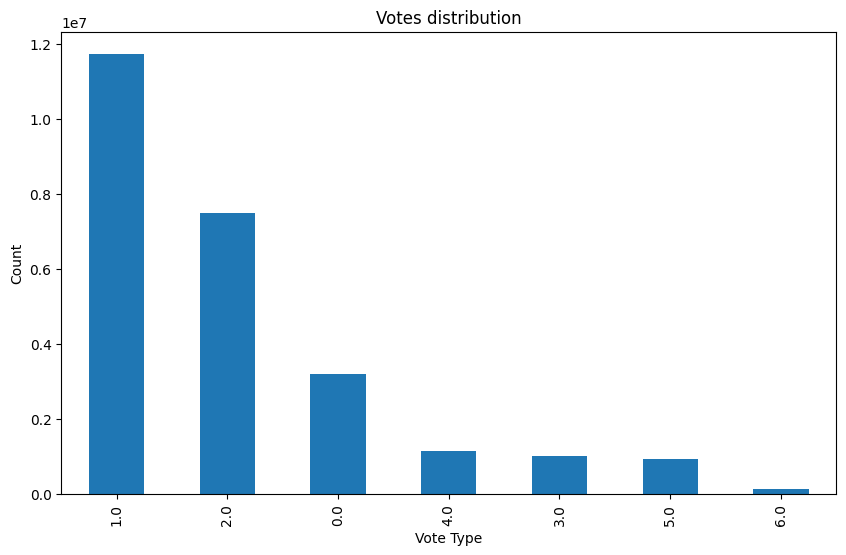

(22450713, 6)


In [68]:
# print number of zeros for votes
print(f"Number of votes: {df_mps_melted.shape}")
# print numbe rof nans anywhere in dataframe
print(f"Number of NaNs: {df_mps_melted.isnull().sum().sum()}")
print(f"Number of zeros in votes: {df_mps_melted[df_mps_melted['Vote'] == 0].shape[0]}")
print(f"Number of 'did not vote' in votes: {df_mps_melted[df_mps_melted['Vote'] == 5].shape[0]}")


# print first 20 rows of votes with zero
display(df_mps_melted[df_mps_melted['Vote'] == 0].head(20))

# display a line plot of the different types of votes
plt.figure(figsize=(10, 6))
df_mps_melted['Vote'].value_counts().plot(kind='bar')
plt.title('Votes distribution')
plt.xlabel('Vote Type')
plt.ylabel('Count')
plt.show()

# delete rows with zero votes
df_mps_melted = df_mps_melted[df_mps_melted['Vote'] != 0]
print(df_mps_melted.shape)

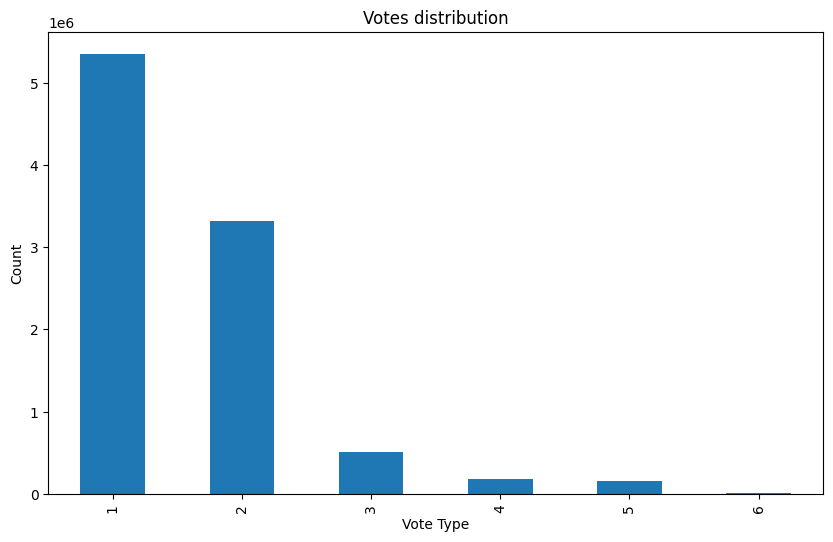

In [29]:
# display a line plot of the different types of votes
plt.figure(figsize=(10, 6))
df_mps_melted['Vote'].value_counts().plot(kind='bar')
plt.title('Votes distribution')
plt.xlabel('Vote Type')
plt.ylabel('Count')
plt.show()

In [30]:
# set all votes > 1 to 0
df_mps_melted['Vote'] = df_mps_melted['Vote'].apply(lambda x: 0 if x > 1 else x)
df_mps_melted.head(20)

,FullName,EPG,Title,Vote
0,"ADAMOWICZ, Magdalena",EPP,1,0
1,"ADEMOV, Asim",EPP,1,0
2,"ADINOLFI, Isabella",EPP,1,0
3,"ADINOLFI, Matteo",IDG,1,0
4,"AGIUS SALIBA, Alex",S&D,1,0
5,"AGUILAR, Mazaly",ECR,1,0
6,"AGUILERA, Clara",S&D,1,0
7,"AINSLIE, Scott",Greens/EFA,1,1
8,"AL-SAHLANI, Abir",REG,1,0
9,"ALEXANDROV YORDANOV, Alexander",EPP,1,0


In [31]:
# group df_mps_melted by EPG and Title and calculate the sum of votes that are 1
df_mps_grouped = df_mps_melted.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index() # in agg-function, function to use on column has to ba a string, see "sum"

# sort the df_mps_grouped by EPG and Title
df_mps_grouped = df_mps_grouped.sort_values(by=['Title', "EPG"])
print(df_mps_grouped.head(20))

              EPG  Title  Vote
0             ECR      1     0
13459         EPP      1     3
26918  Greens/EFA      1    40
40377         IDG      1     0
53836          NI      1     2
67295         REG      1     2
80754         S&D      1    13
94213    The Left      1    22
1             ECR      2     1
13460         EPP      2     5
26919  Greens/EFA      2    67
40378         IDG      2     0
53837          NI      2     7
67296         REG      2    83
80755         S&D      2   114
94214    The Left      2    32
2             ECR      3     2
13461         EPP      3   118
26920  Greens/EFA      3    62
40379         IDG      3     0


In [32]:
# define number of members per group (post-Brexit)
# total of 705 members
num_SD = 144
num_EPP = 176
num_IDG = 64
num_NI = 46
num_Greens = 71
num_REG = 102
num_ECR = 64
num_Left = 38

# dataframe with group name and number of members
group_members_new = pd.DataFrame({'group': ['S&D', 'EPP', 'IDG', 'NI', 'Greens/EFA', 'REG', 'ECR', 'The Left'],
                              'members': [num_SD, num_EPP, num_IDG, num_NI, num_Greens, num_REG, num_ECR, num_Left]})
# set groups as index
group_members_new.set_index('group', inplace=True)
group_members_new

,members
group,
S&D,144
EPP,176
IDG,64
NI,46
Greens/EFA,71
REG,102
ECR,64
The Left,38


In [33]:
# define numbers of members per party for old size of EP (pre-Brexit)
# total of 751 members

num_SD = 154
num_EPP = 182
num_IDG = 73
num_NI = 57
num_Greens = 74
num_REG = 108
num_ECR = 62
num_Left = 41

# dataframe with group name and number of members
group_members = pd.DataFrame({'group': ['S&D', 'EPP', 'IDG', 'NI', 'Greens/EFA', 'REG', 'ECR', 'The Left'],
                              'members': [num_SD, num_EPP, num_IDG, num_NI, num_Greens, num_REG, num_ECR, num_Left]})
# set groups as index
group_members.set_index('group', inplace=True)
group_members

,members
group,
S&D,154
EPP,182
IDG,73
NI,57
Greens/EFA,74
REG,108
ECR,62
The Left,41


In [34]:
# calculate percentage of votes of all members in party
# go through each row of df_mps_grouped and divide the vote by the number of members in the party
for index, row in df_mps_grouped.iterrows():
    group = row['EPG']
    df_mps_grouped.loc[index, 'Sum_in_favour'] = (row['Vote'])
    df_mps_grouped.loc[index, 'Perc_in_favour'] = round(row['Vote']/(group_members.loc[group, 'members']), 3)
display(df_mps_grouped.head(20))

,EPG,Title,Vote,Sum_in_favour,Perc_in_favour
0,ECR,1,0,0.0,0.000
13459,EPP,1,3,3.0,0.016
26918,Greens/EFA,1,40,40.0,0.541
40377,IDG,1,0,0.0,0.000
53836,NI,1,2,2.0,0.035
67295,REG,1,2,2.0,0.019
80754,S&D,1,13,13.0,0.084
94213,The Left,1,22,22.0,0.537
1,ECR,2,1,1.0,0.016
13460,EPP,2,5,5.0,0.027


In [35]:
# pivot table back to wide format, set EPG and Title as columns, keep index from df_mps_grouped
group_perc_in_favour = df_mps_grouped.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])

# rename columns
group_perc_in_favour.columns = ["ECR", "EPP", "Greens/EFA", "IDG", "NI", "REG", "S&D", "The Left",
                                "ECR%", "EPP%", "Greens/EFA%", "IDG%", "NI%", "REG%", "S&D%", "The Left%"
                                ]
# change type of columns
group_perc_in_favour_1 = group_perc_in_favour.iloc[:, 0:8].astype(int)
group_perc_in_favour_2 = group_perc_in_favour.iloc[:, 8:].astype(float)
group_perc_in_favour = pd.concat([group_perc_in_favour_1, group_perc_in_favour_2], axis=1)

display(group_perc_in_favour.head(20))

# save group_perc_in_favour to csv
group_perc_in_favour.to_csv('data/group_perc_in_favour.csv')

,ECR,EPP,Greens/EFA,IDG,NI,REG,S&D,The Left,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
Title,,,,,,,,,,,,,,,,
1,0,3,40,0,2,2,13,22,0.000,0.016,0.541,0.000,0.035,0.019,0.084,0.537
2,1,5,67,0,7,83,114,32,0.016,0.027,0.905,0.000,0.123,0.769,0.740,0.780
3,2,118,62,0,7,91,121,34,0.032,0.648,0.838,0.000,0.123,0.843,0.786,0.829
4,1,125,65,0,5,92,122,29,0.016,0.687,0.878,0.000,0.088,0.852,0.792,0.707
5,1,129,67,0,4,99,128,36,0.016,0.709,0.905,0.000,0.070,0.917,0.831,0.878
6,47,138,5,0,16,101,11,33,0.758,0.758,0.068,0.000,0.281,0.935,0.071,0.805
7,46,129,7,3,2,98,65,2,0.742,0.709,0.095,0.041,0.035,0.907,0.422,0.049
8,48,144,67,28,20,99,96,4,0.774,0.791,0.905,0.384,0.351,0.917,0.623,0.098
9,50,144,3,27,13,100,77,0,0.806,0.791,0.041,0.370,0.228,0.926,0.500,0.000


In [36]:
# merge group_perc_in_favour with voted_docs, merge index with Vote ID
voted_docs['Vote ID'] = voted_docs['Vote ID'].astype(int)
voted_docs_groups = voted_docs.merge(group_perc_in_favour, left_on='Vote ID', right_index=True)

display(voted_docs.shape)
print(group_perc_in_favour.shape)
print(voted_docs_groups.shape)
display(voted_docs_groups.head(10))


(2582, 24)

(13459, 16)
(2582, 40)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,S&D,The Left,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,119,29,0.581,0.764,0.784,0.466,0.421,0.713,0.773,0.707
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,124,30,0.774,0.791,0.824,0.712,0.526,0.787,0.805,0.732
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,126,31,0.710,0.808,0.865,0.205,0.439,0.833,0.818,0.756
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,131,30,0.806,0.808,0.892,0.685,0.895,0.852,0.851,0.732
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,118,33,0.726,0.813,0.851,0.000,0.316,0.778,0.766,0.805
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,118,0,0.774,0.808,0.068,0.014,0.404,0.944,0.766,0.000
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,130,0,0.919,0.769,0.068,0.027,0.351,0.954,0.844,0.000
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,144,25,0.903,0.885,1.000,0.836,0.421,1.009,0.935,0.610
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,143,2,0.903,0.868,0.986,0.836,0.456,0.981,0.929,0.049
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,144,2,0.903,0.885,1.000,0.808,0.456,1.009,0.935,0.049


In [37]:
tested_thresholds = fu.test_thresholds(voted_docs_groups, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds)

,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,1292,0.5,230,0.09,333,0.13
0.70,1273,0.49,236,0.09,338,0.13
0.75,1221,0.47,267,0.1,331,0.13
0.80,1154,0.45,271,0.1,290,0.11
0.85,1038,0.4,270,0.1,257,0.1
0.90,715,0.28,407,0.16,161,0.06
0.95,0,0.0,354,0.14,0,0.0
0.97,0,0.0,5,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


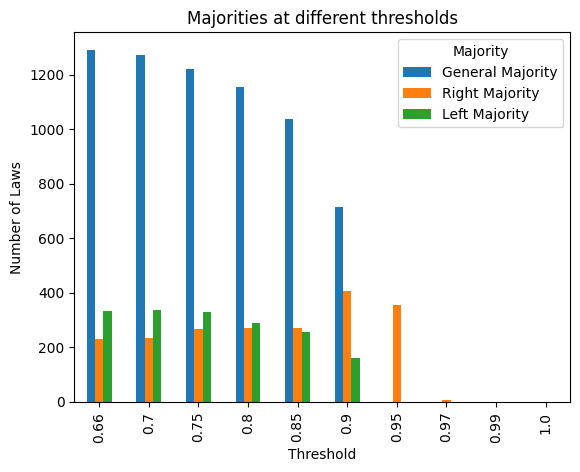

In [38]:
# plot the thresholds
tested_thresholds[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')

plt.show()

In [39]:
voted_majorities = fu.get_majorities(voted_docs_groups, 0.66)

# concatenate the two dataframes
voted_docs_consensus = pd.concat([voted_docs_groups, voted_majorities], axis=1)

# add column "Consensus" if column "No" is 0
voted_docs_consensus['Consensus'] = voted_docs_consensus['No'].apply(lambda x: 1 if x == 0 else 0)

voted_docs_consensus.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.784,0.466,0.421,0.713,0.773,0.707,1,0,0,0
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.824,0.712,0.526,0.787,0.805,0.732,1,0,0,0
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.865,0.205,0.439,0.833,0.818,0.756,1,0,0,0
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.892,0.685,0.895,0.852,0.851,0.732,1,0,0,1
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.851,0.000,0.316,0.778,0.766,0.805,1,0,0,0
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.068,0.014,0.404,0.944,0.766,0.000,1,0,0,0
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.068,0.027,0.351,0.954,0.844,0.000,1,0,0,0
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.000,0.836,0.421,1.009,0.935,0.610,1,0,0,0
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.986,0.836,0.456,0.981,0.929,0.049,1,0,0,0
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.000,0.808,0.456,1.009,0.935,0.049,1,0,0,0


Between 2019 and 2022, 4 laws were passed unanimously.
Between 2019 and 2022, 333 laws were passed with a left majority.
Between 2019 and 2022, 230 laws were passed with a right majority.
Between 2019 and 2022, 1292 laws were passed with a general majority.


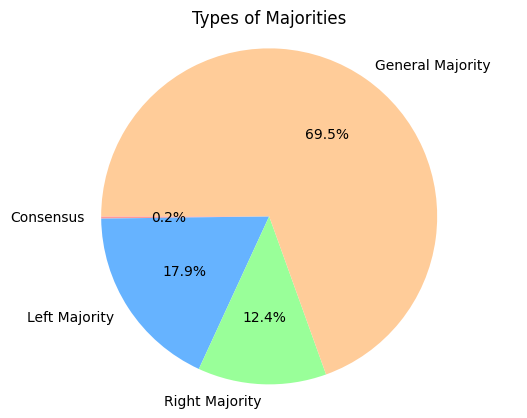

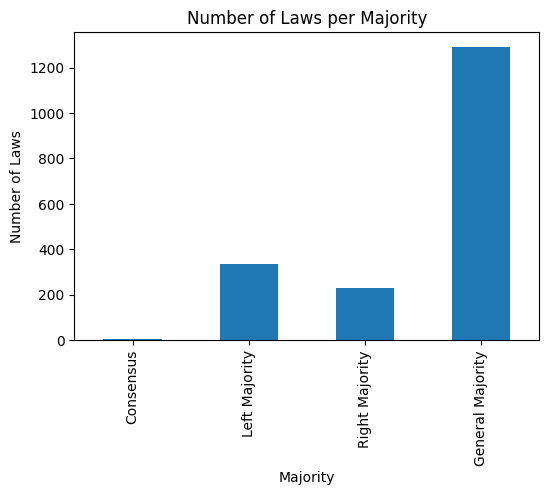

In [214]:
# print number of consensus laws
consensus_laws = voted_docs_consensus[voted_docs_consensus['Consensus'] == 1].shape[0]
print(f"Between 2019 and 2022, {consensus_laws} laws were passed unanimously.")

# print number of laws with left majority
left_majority = voted_docs_consensus[voted_docs_consensus['Left Majority'] == 1].shape[0]
print(f"Between 2019 and 2022, {left_majority} laws were passed with a left majority.")

# print number of laws with right majority
right_majority = voted_docs_consensus[voted_docs_consensus['Right Majority'] == 1].shape[0]
print(f"Between 2019 and 2022, {right_majority} laws were passed with a right majority.")

# print number of laws with general majority
general_majority = voted_docs_consensus[voted_docs_consensus['General Majority'] == 1].shape[0]
print(f"Between 2019 and 2022, {general_majority} laws were passed with a general majority.")

# Plot a pie chart of the different types of majorities
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_laws, left_majority, right_majority, general_majority]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Types of Majorities')
plt.axis('equal')
plt.show()

# plot a histogram of the number of laws per majority
plt.figure(figsize=(6, 4))
voted_docs_consensus[['Consensus', 'Left Majority', 'Right Majority', 'General Majority']].sum().plot(kind='bar')
plt.title('Number of Laws per Majority')
plt.xlabel('Majority')
plt.ylabel('Number of Laws')
plt.show()

In [41]:
# save to csv
voted_docs_consensus.to_csv('data/voted_docs_consensus.csv')

Delete votes on amendments from dataframe

In [4]:
# read csv file voted_docs_consensus
# voted_docs_consensus = pd.read_csv('data/voted_docs_consensus.csv')


In [50]:
# Delete votes on amendments

# copy voted_docs_consensus to voted_docs_consensus_laws
voted_docs_final_laws = voted_docs_consensus.copy()
print(voted_docs_final_laws.shape)

# if Subject column begins with "Art" or "Committee - separate", delete row
voted_docs_final_laws = voted_docs_consensus[~voted_docs_consensus['Subject'].str.contains('Art|Paragraph|paragraph|point|Committee - separate')]
print(voted_docs_final_laws.shape)

# if "Subject" is "vote: Commission proposal" and title appears in more than one row, keep only row where Subject is "vote: Commission proposal"
voted_docs_final_laws_test = voted_docs_final_laws[~((voted_docs_final_laws['Subject'] != 'Vote: Commission proposal') & (voted_docs_final_laws['Title'].duplicated(keep = False)))]

print(voted_docs_final_laws_test.shape)
display(voted_docs_final_laws_test.head(10))


(2582, 44)
(1120, 44)
(193, 44)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.784,0.466,0.421,0.713,0.773,0.707,1,0,0,0
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.865,0.205,0.439,0.833,0.818,0.756,1,0,0,0
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.892,0.685,0.895,0.852,0.851,0.732,1,0,0,1
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.851,0.000,0.316,0.778,0.766,0.805,1,0,0,0
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.068,0.014,0.404,0.944,0.766,0.000,1,0,0,0
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.068,0.027,0.351,0.954,0.844,0.000,1,0,0,0
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.000,0.836,0.421,1.009,0.935,0.610,1,0,0,0
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.986,0.836,0.456,0.981,0.929,0.049,1,0,0,0
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.000,0.808,0.456,1.009,0.935,0.049,1,0,0,0
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,1.000,0.836,0.439,1.009,0.935,0.024,1,0,0,0


Between 2019 and 2022, 4 laws were passed unanimously.
Between 2019 and 2022, 2 laws were passed with a left majority.
Between 2019 and 2022, 5 laws were passed with a right majority.
Between 2019 and 2022, 177 laws were passed with a general majority.


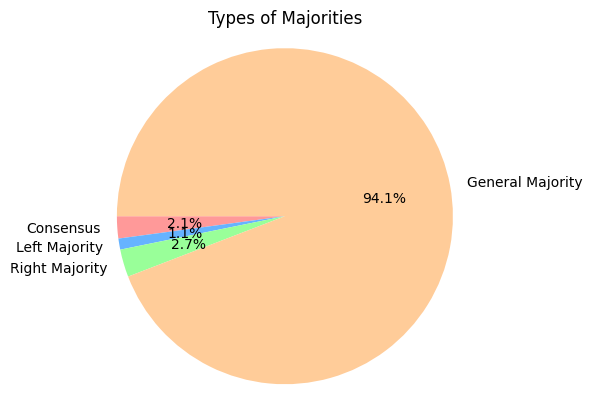

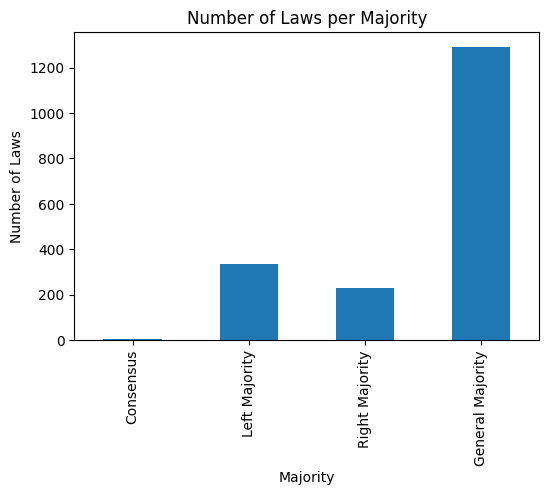

In [215]:
# print number of consensus laws
consensus_laws = voted_docs_final_laws_test[voted_docs_final_laws_test['Consensus'] == 1].shape[0]
print(f"Between 2019 and 2022, {consensus_laws} laws were passed unanimously.")

# print number of laws with left majority
left_majority = voted_docs_final_laws_test[voted_docs_final_laws_test['Left Majority'] == 1].shape[0]
print(f"Between 2019 and 2022, {left_majority} laws were passed with a left majority.")

# print number of laws with right majority
right_majority = voted_docs_final_laws_test[voted_docs_final_laws_test['Right Majority'] == 1].shape[0]
print(f"Between 2019 and 2022, {right_majority} laws were passed with a right majority.")

# print number of laws with general majority
general_majority = voted_docs_final_laws_test[voted_docs_final_laws_test['General Majority'] == 1].shape[0]
print(f"Between 2019 and 2022, {general_majority} laws were passed with a general majority.")

# Plot a pie chart of the different types of majorities
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_laws, left_majority, right_majority, general_majority]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Types of Majorities')
plt.axis('equal')
plt.show()

# plot a histogram of the number of laws per majority
plt.figure(figsize=(6, 4))
voted_docs_consensus[['Consensus', 'Left Majority', 'Right Majority', 'General Majority']].sum().plot(kind='bar')
plt.title('Number of Laws per Majority')
plt.xlabel('Majority')
plt.ylabel('Number of Laws')
plt.show()

In [51]:
# Save voted_docs_consensus_laws to csv
voted_docs_final_laws_test.to_csv('data/voted_docs_final_laws.csv')

Dieses Filtern nochmal genau überprüfen!

In dieser Auswahl fehlt zum Beispiel ein Gesetz, das im Subject Proposal to reject the Commission proposal hat, Index 1017. Warum ist das nicht drin?

Übersicht machen, wie viele Gesetze dann pro Jahr übrig bleiben und ob das plausibel ist.

If the major parties voted in favour, in how many cases did the further right- or left-leaning parties vote with them?

Das hier nochmal überprüfen - haben NI tatsächlich in fast allen Fällen sowohl mit Rechts als auch mit Links gewählt?

In [47]:
vote_alingment = fu.get_vote_alingment(voted_docs_consensus, 
                                    ['The Left', "Greens/EFA", "S&D", "REG", "EPP", "ECR", "IDG", "NI"], 
                                    ['Left Majority', "Right Majority", "General Majority"]
                                    )
# rename columns
vote_alingment.columns = ['Left Majority', 'Left Majority%', 'Right Majority', 'Right Majority%', 'General Majority', 'General Majority%']

display(vote_alingment)

,Left Majority,Left Majority%,Right Majority,Right Majority%,General Majority,General Majority%
Voted with,,,,,,
The Left,324,97.30%,168,73.04%,1225,94.81%
Greens/EFA,323,97.00%,86,37.39%,1202,93.03%
S&D,333,100.00%,207,90.00%,1292,100.00%
REG,333,100.00%,230,100.00%,1292,100.00%
EPP,326,97.90%,230,100.00%,1292,100.00%
ECR,253,75.98%,228,99.13%,1263,97.76%
IDG,240,72.07%,224,97.39%,1162,89.94%
NI,333,100.00%,228,99.13%,1292,100.00%


Add legislative text to each row in the dataframe

In [142]:
# extract report links
voted_docs_final = fu.construct_report_links(voted_docs_final_laws_test)
display(voted_docs_final.head(10))
print(voted_docs_final.shape)

c:\Users\Cäcilia\OneDrive\Dokumente\_Masterstudium\Thesis\Thesis_db\helper_functions.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Report link'] = base_url + df_copy['Interinstitutional file number'].astype(str)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.833,0.818,0.756,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.852,0.851,0.732,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.778,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,NA
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,1.009,0.935,0.024,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,NA,NA


(193, 47)


In [101]:
# print first row of voted_docs_final
voted_docs_final.iloc[0, 44]


'https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0180(COD)'

In [146]:
#delete last column
#voted_docs_final = voted_docs_final.iloc[:, :-1]
#voted_docs_final.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,IDG%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.466,0.421,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.205,0.439,0.833,0.818,0.756,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.685,0.895,0.852,0.851,0.732,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.000,0.316,0.778,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.014,0.404,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.027,0.351,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.836,0.421,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.836,0.456,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.808,0.456,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,0.836,0.439,1.009,0.935,0.024,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...


In [150]:
import requests
from bs4 import BeautifulSoup
import re
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor

def fetch_summary_link(url):
    """
    Fetches HTML content for a given URL, parses it, and extracts the summary link.
    """
    try:
        # Get HTML from the URL
        response = requests.get(url)
        response.raise_for_status()  # Raises an HTTPError for bad responses
        # Parse HTML
        soup = BeautifulSoup(response.text, 'html.parser')
        # Find all "button" elements with id "summary"
        buttons = soup.find_all("button", {"id": "summary"})
        
        # Iterate over found buttons to find the one with the specific title
        #for button in buttons:
        #    if button.get('title') == "Summary for Legislative proposal published":
        #        print(button)
        for button in buttons:
            if (
                button.get('title') == "Summary for Legislative proposal published"
                ) or (
                    "Summary for Committee report tabled for plenary, 1st reading" in button.get('title')
                      ) or (
                          button.get('title') == "Summary for Preparatory document"
                          ):
                # Check if the button has an 'onclick' attribute
                if 'onclick' in button.attrs:
                    # Extract the link directly from the onclick attribute
                    onclick_content = button['onclick'].split("'")[1]
                    summary_link = "https://oeil.secure.europarl.europa.eu" + onclick_content
                    return summary_link
            elif "Summary for Decision by Parliament" in button.get('title'):
                # Check if the button has an 'onclick' attribute
                if 'onclick' in button.attrs:
                    # Extract the link directly from the onclick attribute
                    onclick_content = button['onclick'].split("'")[1]
                    summary_link = "https://oeil.secure.europarl.europa.eu" + onclick_content
                    return summary_link
        return None  # Return None if no matching button is found
    except requests.RequestException as e:
        print(f"Failed to retrieve or parse {url}: {e}")
        return "NA"
    
def extract_summary_links(urls):
    """
    Processes a list of URLs sequentially to extract summary links.
    """
    summary_links = []
    for url in urls:
        try:
            result = fetch_summary_link(url)
            if result:
                summary_links.append(result)
                print(f"Links requested: {len(summary_links)}", end='\r')
            else:
                summary_links.append("NA")
        except Exception as exc:
            print(f'{url} generated an exception: {exc}')
            summary_links.append("NA")
    # Print final count on a new line once all URLs are processed
    print(f"\nTotal links successfully extracted {len(summary_links) - summary_links.count("NA")} out of {len(summary_links)}")
    return summary_links

In [151]:
# extract summary links
# take each link from column "Report link", parse html, find "button" with id "summary"
summary_links = extract_summary_links(voted_docs_final['Report link'])

Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0001(COD): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0001(COD)
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=nan: 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=nan
Links extracted: 193
Total links extracted: 193


In [152]:
# print first ten summary links
print(summary_links[:10])
# print number of NAs in summary links
print(summary_links.count("NA"))

['https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589986&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1594772&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589981&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589992&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589357&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589750&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1590181&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1585141&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1585147&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1598542&t=e&l=en']
3


In [154]:
# add summary links to voted_docs_final
voted_docs_final['Summary link'] = summary_links
voted_docs_final.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.421,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.439,0.833,0.818,0.756,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.895,0.852,0.851,0.732,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.316,0.778,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.404,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.351,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.421,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.456,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.456,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,0.439,1.009,0.935,0.024,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...


In [178]:
def fetch_summary_texts(url):
    """
    Fetch the content of a URL and process the HTML to extract cleaned summary text.
    """
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
    # Find the element using a regex to flexibly match the string
        summary_elements = soup.find_all('span', lang="EN-GB")
        if summary_elements:
            summary_text = " ".join(re.sub(r'\s+', ' ', item.text.strip()) for item in summary_elements)
            return summary_text
        return None
    except requests.RequestException as e:
        print(f"Failed to retrieve or parse {url}: {e}")
        return "NA"

def extract_summary_texts(urls):
    """
    Takes a list of urls and extracts the summary text from the html of the page
    by combining all the paragraphs of the summary into one string.
    Returns a list of summary texts.
    """
    summaries = []
    for url in urls:
        try:
            result = fetch_summary_texts(url)
            if result:
                summaries.append(result)
                print(f"Summaries extracted: {len(summaries)}", end='\r')
            else:
                summaries.append("NA")
        except Exception as exc:
            print(f'{url} generated an exception: {exc}')
    return summaries

In [179]:
summary_texts = extract_summary_texts(["https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1583141&t=e&l=en"])
print(summary_texts)

["PURPOSE: to empower Germany to amend its existing bilateral road transport agreement with Switzerland with a view to authorising cabotage operations in the course of international road passenger transport services by coach and bus in the border regions between the two countries. PROPOSED ACT: Decision of the European Parliament and the Council. ROLE OF THE EUROPEAN PARLIAMENT: the European Parliament decides in accordance with the ordinary legislative procedure and on an equal footing with the Council. BACKGROUND: the two-way carriage of passengers and goods by road between Switzerland and the EU is regulated by the Land Transport Agreement between the EU and Switzerland ('EU Agreement'). Under the EU Agreement, the transport of passengers by coach and bus between two points situated on the territory of the same Contracting Party by carriers established in the territory of the other Contracting Party, known as cabotage, is not authorised. This means that the carriers operating the pa

In [180]:
# extract summary texts
summary_texts = extract_summary_texts(voted_docs_final['Summary link'])

# append texts to voted_docs_final as new column
voted_docs_final['Summary text'] = summary_texts
voted_docs_final.head(10)


Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to enable the European Globalisation ...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.833,0.818,0.756,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to mitigate the negative effects of t...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.852,0.851,0.732,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.778,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to extend the scope of the European U...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"PURPOSE: to conclude, on behalf of the Union, ..."
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to review the functioning of an exist...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to provide further macro-financial as...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,1.009,0.935,0.024,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"The Committee on Civil Liberties, Justice and ..."


In [181]:
# print number of NAs in Summary text
print((voted_docs_final['Summary text']=="NA").sum())

4


In [ ]:
# for better formatting in csv, put "" around every text value in any cell
#voted_docs_final = voted_docs_final.applymap(lambda x: f'"{x}"' if type(x) == str else x)
#voted_docs_final.to_csv('data/voted_docs_final.csv')

In [203]:
# save voted_docs_final
voted_docs_final.to_csv('data/voted_docs_final_193.csv')

Andere Fragen:

Is there a difference in consensus between adopted and rejected laws?